# Getting started
Just some small tests to get a feel of how to interact with the data and get started.
Preliminary remarks:  
Canny edge detector works pretty well out of the box but requires some tuning. There are some false positives and negatives.
Since we have ground truth we could try tuning by finding the parameters that result in the best performance.

There are two types of problem:
* A. Is there a crack in the image?
* B. Where is the crack?

For a ML approach a potential issue is the fact that the number of training samples is not that large. To train the A. model we need negative examples. We should do some data augmentation:
* Split the image in subset 
* Rotate, Skew, Flip (same for the ground truth)

First step, data augmentation

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
data_path='/home/coline/Documents/opencv_project/CrackForest-dataset/CrackForest-dataset-master'

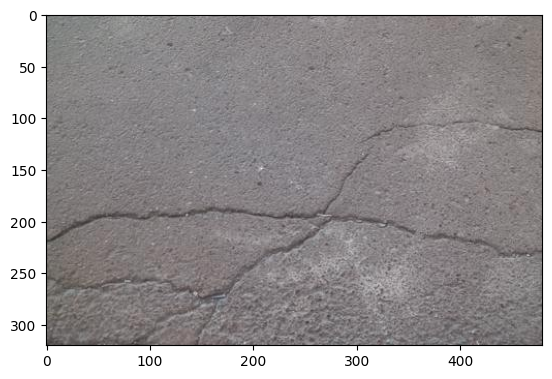

In [3]:
img = cv.imread(data_path+'/image/002.jpg')
plt.imshow(img)

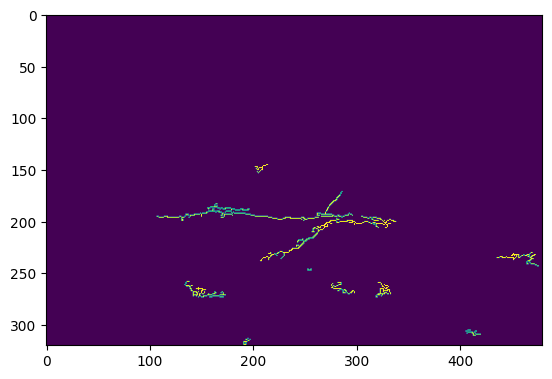

In [4]:
# Canny edge detection
# First convolution of the image with a Gaussian kernel to denoise
# Then compute the gradient
# Then find maximum along gradient (it's interesting how these operations are similar to what CNN layers do with the convolution and max pooling)
# Dual threshold filter: low_val, high_val
# [0,low_val]->not an edge, [low_val, high_val]->weak edge, [high_val, infty]-> strong edge
edges = cv.Canny(img,100,400)
plt.imshow(edges)

In [5]:
import scipy.io
matfile=scipy.io.loadmat(data_path+'/groundTruth/002.mat')
matfile['groundTruth']
# Segmentation, Boundaries

array([[(array([[1, 1, 1, ..., 1, 1, 1],
               [1, 1, 1, ..., 1, 1, 1],
               [1, 1, 1, ..., 1, 1, 1],
               ...,
               [1, 1, 1, ..., 1, 1, 1],
               [1, 1, 1, ..., 1, 1, 1],
               [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))                                ]],
      dtype=[('Segmentation', 'O'), ('Boundaries', 'O')])

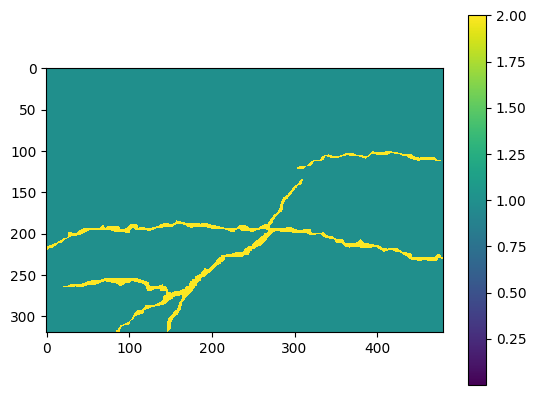

In [13]:
fig, ax =plt.subplots(1)
cmap = plt.get_cmap('viridis')
cmap.set_under('white',alpha=0)
cmap_args = dict(cmap=cmap, vmin=0.0001, vmax=2.0)
mappable=ax.imshow(matfile['groundTruth'][0][0][0], interpolation='none', **cmap_args)
plt.colorbar(mappable,ax=ax)

Format of the groundtruth: segmentation 1 (not crack) or 2 (crack), boundaries 0 (not boundary) or 1 (crack boundary)

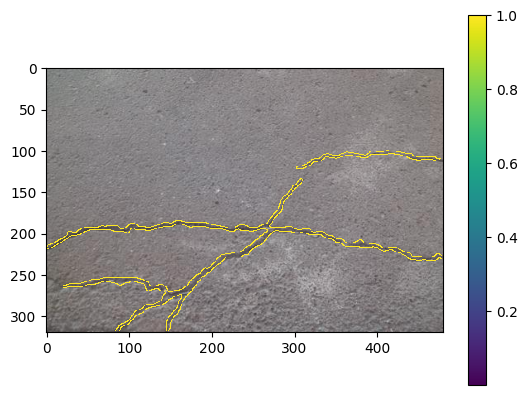

In [29]:
fig, ax =plt.subplots(1)
ax.imshow(img)

cmap = plt.get_cmap('viridis')
cmap.set_under('white',alpha=0)
cmap_args = dict(cmap=cmap, vmin=0.0001, vmax=1.0)
mappable=ax.imshow(matfile['groundTruth'][0][0][1], label='groud truth edges', **cmap_args, interpolation='none')
plt.colorbar(mappable,ax=ax)

In [17]:
matfile['groundTruth'][0][0][1].where

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)